In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**Import Required Libraries**

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import random as rnd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
from scipy.stats import norm, skew
from scipy import stats
from scipy.special import boxcox1p
from sklearn.svm import SVR


**Load the dataset**

In [3]:
#Load the training dataset
training_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
#Load the test dataset
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

**Explore the dataset**

In [4]:
#Explore the dataset
#Display the columns in the training dataset
print(training_data.columns)

#Display Information about each column
print(training_data.info())

#Display the top few rows of the training dataset
training_data.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Describe details about each column
training_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#After describing each dataset, create a concatenated dataframe
concatenated_data = pd.concat([training_data, test_data], axis=0, ignore_index=True)
concatenated_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


**Visualize Data**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


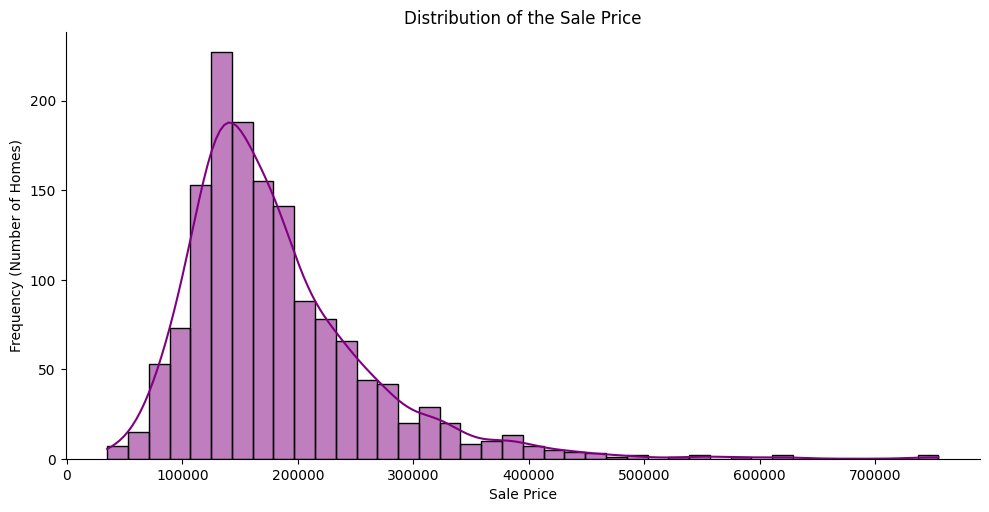

In [7]:
#Visualize the ditribution of the SalePrice target variable
sns.displot(training_data['SalePrice'],
            bins=40,
            aspect=2,
            kde=True,
            color='purple')
plt.title("Distribution of the Sale Price")
plt.xlabel('Sale Price')
plt.ylabel('Frequency (Number of Homes)')
plt.show()

**Correlation Matrix Creation**

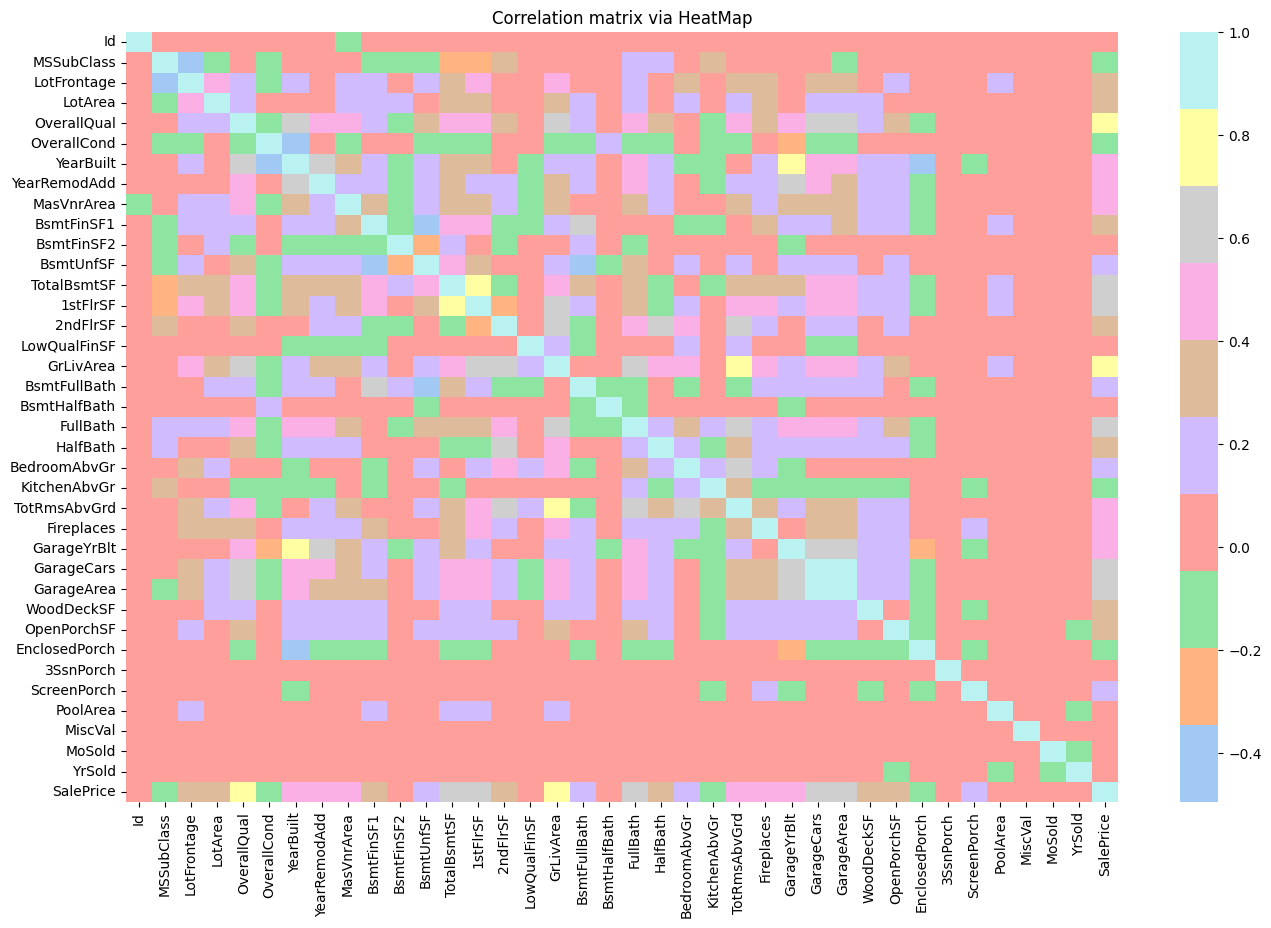

In [8]:
#Create variable for numerical columns
numerical_columns = training_data.select_dtypes(include=['number'])

#Plotting Correlation matrix
plt.figure(figsize=(16,10))
heatmap_generation = sns.heatmap(numerical_columns.corr(),
                                 annot=False,
                                 cmap=sns.color_palette("pastel", as_cmap=True)
                                )
heatmap_generation.set_title('Correlation matrix via HeatMap')
plt.show() 

**Other Visualizations**

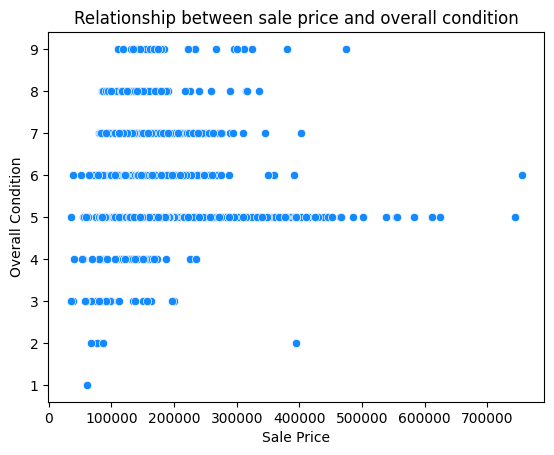

<Figure size 300x200 with 0 Axes>

In [9]:
sns.scatterplot(x='SalePrice', y='OverallCond', data=training_data, color='#1589FF')
plt.title("Relationship between sale price and overall condition")
plt.ylabel('Overall Condition')
plt.xlabel('Sale Price')
plt.figure(figsize=(3,2))
plt.show()

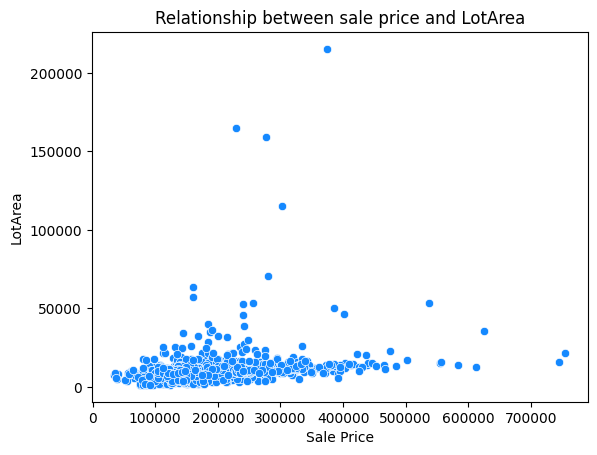

<Figure size 300x200 with 0 Axes>

In [10]:
sns.scatterplot(x='SalePrice', y='LotArea', data=training_data, color='#1589FF')
plt.title("Relationship between sale price and LotArea")
plt.ylabel('LotArea')
plt.xlabel('Sale Price')
plt.figure(figsize=(3,2))
plt.show()

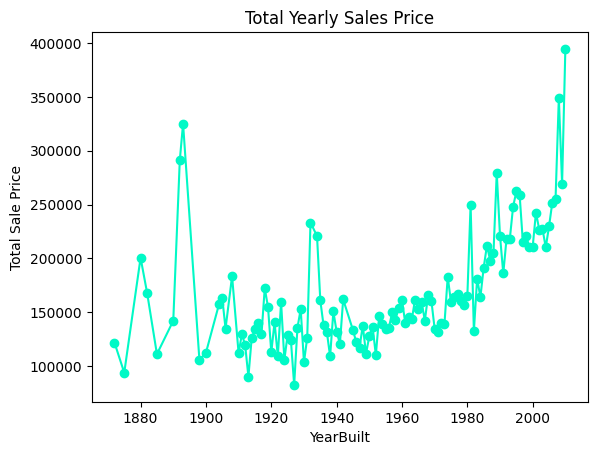

<Figure size 1600x1000 with 0 Axes>

In [11]:
#Total Sales Price (Periodic- Over the years)
year_salesprice_total = training_data.groupby('YearBuilt')['SalePrice'].mean()
plt.plot(year_salesprice_total.index, year_salesprice_total.values, marker='o', linestyle='-', color="#01F9C6")
plt.title("Total Yearly Sales Price")
plt.ylabel('Total Sale Price')
plt.xlabel('YearBuilt')
plt.figure(figsize=(16,10))
plt.show()


**Cleaning the data**

In [12]:
y_train = training_data['SalePrice']
#The sale price column from the concatenated dataset will be dropped
concatenated_data.drop('SalePrice',axis=1,inplace=True)
y_train.head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [13]:
#Show the missing data as a percentage of all the data
missing_dataset = (concatenated_data.isnull().sum()/len(concatenated_data))*100
missing_dataset=missing_dataset.drop(missing_dataset[missing_dataset==0].index).sort_values(ascending=False)[:20]
missing_data=pd.DataFrame({'Missing Ratio': missing_dataset})
missing_data.head(10)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
MasVnrType,60.500171
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071


In [14]:
#By judging from the pproportion of missing data it was decided to drop certain columns as they do not hold much significance towards the end saleprice
columnFeatures_to_drop =['Id', 'MiscFeature','Fence','MasVnrType','PoolQC','FireplaceQu','LotFrontage','Alley']
concatenated_data.drop(columnFeatures_to_drop, axis=1, inplace=True)
concatenated_data.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal


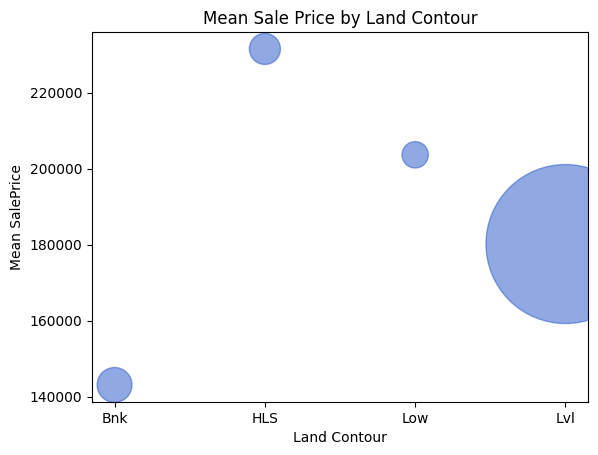

<Figure size 1000x600 with 0 Axes>

In [15]:
#Visualize other variables to decide whether to keep them or not
data_grouped1 = training_data.groupby('LandContour').agg({'SalePrice':'mean','LandContour':'count'}).rename(columns={'LandContour':'Count'}).reset_index()
bubble_size=data_grouped1['Count']
plt.scatter(data_grouped1['LandContour'], data_grouped1['SalePrice'], s=bubble_size*10, alpha=0.5, c='#2554C7')
plt.title("Mean Sale Price by Land Contour")
plt.ylabel('Mean SalePrice')
plt.xlabel('Land Contour')
plt.figure(figsize=(10,6))
plt.show()

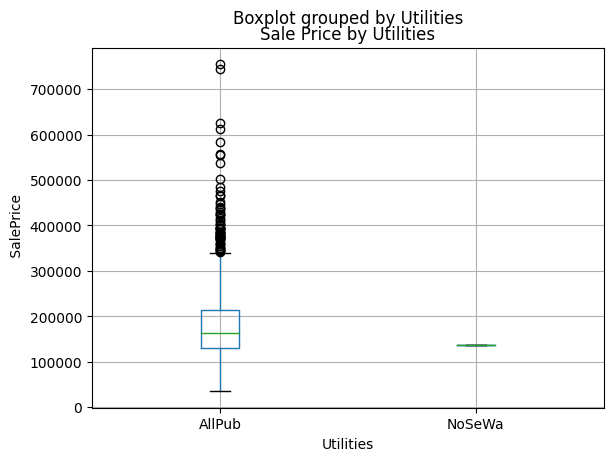

<Figure size 1000x600 with 0 Axes>

In [16]:
training_data.boxplot(column='SalePrice', by='Utilities')
plt.title("Sale Price by Utilities")
plt.ylabel(' SalePrice')
plt.xlabel('Utilities')
plt.figure(figsize=(10,6))
plt.show()

In [17]:
#Columns deleted due to single vaalue composition
columns_tobe_deleted = ['LandContour',
                        'LandSlope',
                        'RoofMatl',
                        'BsmtFinSF2',
                        'LowQualFinSF',
                        'GarageQual',
                        'EnclosedPorch',
                        'PoolArea',
                        'KitchenAbvGr',
                        'BsmtHalfBath',
                        'BsmtFinType2',
                        'Electrical',
                        'CentralAir',
                        'ScreenPorch',
                        'MiscVal',
                        '3SsnPorch',
                        'GarageCond',
                        'Functional',
                        'Heating',
                        'Condition2',
                        'Utilities',
                        'Street']

#Under the assumption that the year and sale type does not affect the final sale price of a house
Not_Dependant = ['MoSold','YrSold','SaleType']

concatenated_data.drop(columns_tobe_deleted+Not_Dependant, axis=1, inplace=True)

concatenated_data.head(5)

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition
0,60,RL,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,...,0,Attchd,2003.0,RFn,2.0,548.0,Y,0,61,Normal
1,20,RL,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,...,1,Attchd,1976.0,RFn,2.0,460.0,Y,298,0,Normal
2,60,RL,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,...,1,Attchd,2001.0,RFn,2.0,608.0,Y,0,42,Normal
3,70,RL,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,...,1,Detchd,1998.0,Unf,3.0,642.0,Y,0,35,Abnorml
4,60,RL,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,...,1,Attchd,2000.0,RFn,3.0,836.0,Y,192,84,Normal


In [18]:
#Describe the concatenated dataset
concatenated_data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000
mean,57.137718,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,560.772104,1051.777587,...,1.568003,0.380267,2.860226,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811
std,42.517628,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,439.543659,440.766258,...,0.552969,0.502872,0.822693,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,220.000000,793.000000,...,1.000000,0.000000,2.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000
50%,50.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,467.000000,989.500000,...,2.000000,0.000000,3.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000
75%,70.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,805.500000,1302.000000,...,2.000000,1.000000,3.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,...,4.000000,2.000000,8.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000


**Transforming data using Label Encoder**

In [19]:
#Feature Engineering Function - Calculation of Age of the house
concatenated_data['YearBuilt']=2023- concatenated_data['YearBuilt']
concatenated_data['YearRemodAdd']=2023- concatenated_data['YearRemodAdd']
concatenated_data['GarageYrBlt']=2023- concatenated_data['GarageYrBlt']

In [20]:
#Use of label encoding
label_encoding = LabelEncoder()
categorical_columns = concatenated_data.select_dtypes(include=['O']).columns.tolist()

for column in categorical_columns:
    concatenated_data[column] = label_encoding.fit_transform(concatenated_data[column])
    
concatenated_data.head(5)

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition
0,60,3,8450,3,4,5,2,0,5,7,...,0,1,20.0,1,2.0,548.0,2,0,61,4
1,20,3,9600,3,2,24,1,0,2,6,...,1,1,47.0,1,2.0,460.0,2,298,0,4
2,60,3,11250,0,4,5,2,0,5,7,...,1,1,22.0,1,2.0,608.0,2,0,42,4
3,70,3,9550,0,0,6,2,0,5,7,...,1,5,25.0,2,3.0,642.0,2,0,35,0
4,60,3,14260,0,2,15,2,0,5,8,...,1,1,23.0,1,3.0,836.0,2,192,84,4


In [21]:
#Recheck to see if all there are any more null values
concatenated_data.fillna(0, inplace=True)
missing_dataset = (concatenated_data.isnull().sum()/len(concatenated_data))*100
missing_dataset=missing_dataset.drop(missing_dataset[missing_dataset==0].index).sort_values(ascending=False)[:30]
missing_data=pd.DataFrame({'Missing Ratio': missing_dataset})
missing_data.head(10)

,Missing Ratio


**Transforming SalePrice to Log-Normal Form**

/tmp/ipykernel_20/4285250393.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, fit=norm, color='#43C6DB')



 mu = 180921.1959 and sigma=79415.2919 



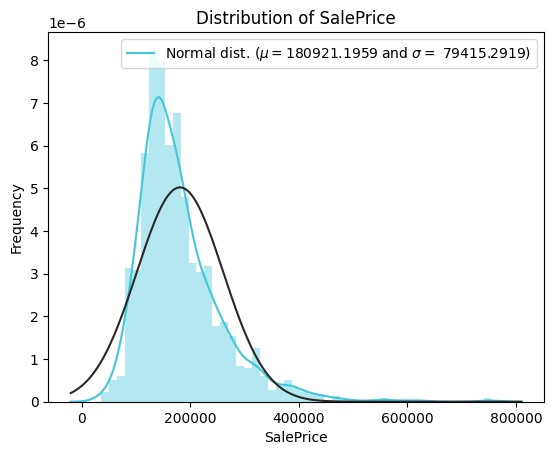

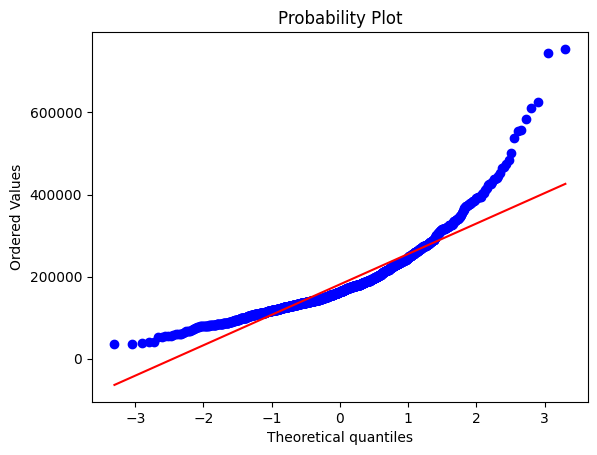

In [22]:
sns.distplot(y_train, fit=norm, color='#43C6DB')
(mu, sigma) = norm.fit(y_train)
print('\n mu = {:.4f} and sigma={:.4f} \n'.format(mu, sigma))
plt.legend (['Normal dist. ($\mu=${:.4f} and $\sigma=$ {:.4f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
fig=plt.figure()
res= stats.probplot(y_train, plot=plt)
plt.show()

In [23]:
#Above we can see the form of a tail
#Log transformation
y_train = np.log1p(y_train)

/tmp/ipykernel_20/3276534483.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, fit=norm, color='#43C6DB')



 mu = 12.0241 and sigma=0.3993 



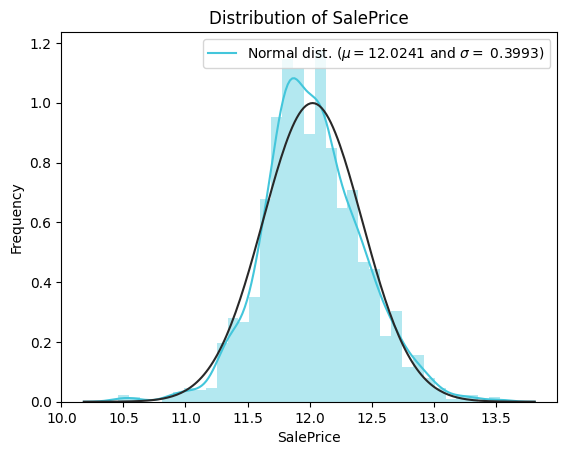

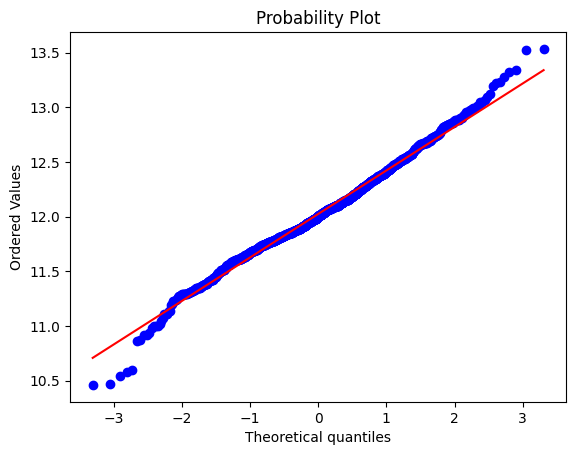

In [24]:
#Recheck the normalization via a plot
sns.distplot(y_train, fit=norm, color='#43C6DB')
(mu, sigma) = norm.fit(y_train)
print('\n mu = {:.4f} and sigma={:.4f} \n'.format(mu, sigma))
plt.legend (['Normal dist. ($\mu=${:.4f} and $\sigma=$ {:.4f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
fig=plt.figure()
res= stats.probplot(y_train, plot=plt)
plt.show()

In [25]:
#Now that we have normalized the saleprice, we can check the skewness of the other variables
#Check skewness of variables
skewness = pd.DataFrame(columns=['Column Name', 'Skewness', 'Skewness Type'])
numerics = concatenated_data.dtypes[concatenated_data.dtypes !='object'].index
for column in numerics:
    skew_value = skew(concatenated_data[column])
    skew_type = "Positively Skewed" if skew_value>0 else ("Negatively Skewed" if skew_value <0 else "Approx. Normally Distributed")
    skewness = skewness._append({'Column Name': column, 'Skewness':skew_value, 'Skewness Type':skew_type}, ignore_index=True)
   
skewness.head()

,Column Name,Skewness,Skewness Type
0,MSSubClass,1.375457,Positively Skewed
1,MSZoning,-1.696183,Negatively Skewed
2,LotArea,12.822431,Positively Skewed
3,LotShape,-0.617690,Negatively Skewed
4,LotConfig,-1.196286,Negatively Skewed


In [26]:
numerics = concatenated_data.dtypes[concatenated_data.dtypes !='object'].index
skewed_feats = concatenated_data[numerics].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
print("\n Skewness \n")
skewness= pd.DataFrame({'Skew' : skewed_feats})
skewness.head()


 Skewness 



,Skew
LotArea,12.822431
Condition1,2.983114
MasVnrArea,2.613592
OpenPorchSF,2.535114
BldgType,2.192261



 mu = 12.0241 and sigma=0.3993 



/tmp/ipykernel_20/2456396847.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_ms, fit=norm, color='#ADFF2F')


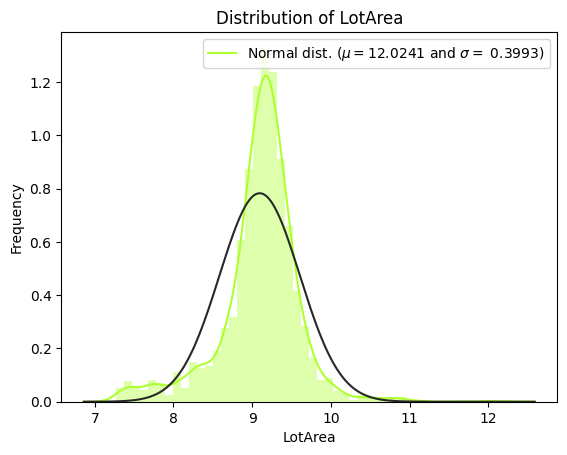

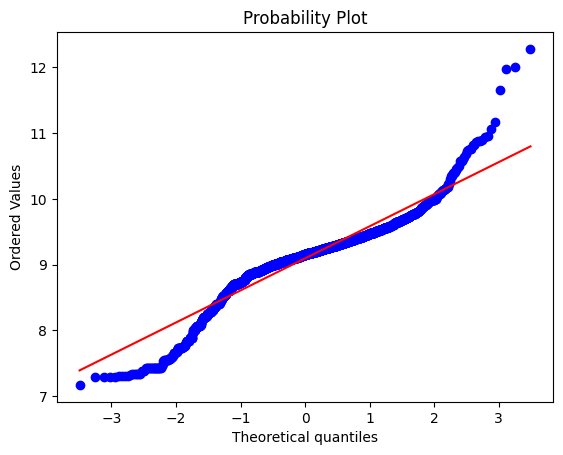

In [27]:
#Transform and Visualize the distribution of MSSubClass
y_train_ms = np.log1p(concatenated_data['LotArea'])

sns.distplot(y_train_ms, fit=norm, color='#ADFF2F')
(mu, sigma) = norm.fit(y_train)
print('\n mu = {:.4f} and sigma={:.4f} \n'.format(mu, sigma))
plt.legend (['Normal dist. ($\mu=${:.4f} and $\sigma=$ {:.4f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of LotArea')
fig=plt.figure()
res= stats.probplot(y_train_ms, plot=plt)
plt.show()

In [28]:
#Obtain the number of numerics to undergo the box cox transformation
skewness = skewness[abs(skewness)>0.75]
print("Number of skewed numerical variables to undergo Box Cox transformation are {}".format(skewness.shape[0]))

skewed_variables = skewness.index #Variables can also be referred to as features
lam = 0.15
for feat in skewed_variables:
    concatenated_data[feat] = boxcox1p(concatenated_data[feat],lam)

concatenated_data[skewed_variables] = np.log1p(concatenated_data[skewed_variables])
concatenated_data

Number of skewed numerical variables to undergo Box Cox transformation are 47


,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition
0,1.899792,0.932543,3.006286,0.932543,1.036855,1.116990,0.785871,0.000000,1.116990,1.235549,...,0.000000,0.548389,1.580793,0.548389,0.785871,2.442892,0.785871,0.000000,1.904295,1.036855
1,1.580793,0.932543,3.030723,0.932543,0.785871,1.636608,0.548389,0.000000,0.785871,1.181627,...,0.548389,0.548389,1.832319,0.548389,0.785871,2.403525,0.785871,2.303605,0.000000,1.036855
2,1.899792,0.932543,3.060922,0.000000,1.036855,1.116990,0.785871,0.000000,1.116990,1.235549,...,0.548389,0.548389,1.610122,0.548389,0.785871,2.466024,0.785871,0.000000,1.800615,1.036855
3,1.941469,0.932543,3.029726,0.000000,0.000000,1.181627,0.785871,0.000000,1.116990,1.235549,...,0.548389,1.116990,1.648940,0.785871,0.932543,2.478071,0.785871,0.000000,1.748353,0.000000
4,1.899792,0.932543,3.105714,0.000000,0.785871,1.490229,0.785871,0.000000,1.116990,1.281654,...,0.548389,0.548389,1.623687,0.548389,0.932543,2.535893,0.785871,2.198766,1.989891,1.036855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2.154092,1.036855,2.713464,0.932543,1.036855,1.357341,0.785871,0.932543,1.116990,1.036855,...,0.000000,1.181627,0.000000,0.932543,0.000000,0.000000,0.785871,0.000000,0.000000,1.036855
2915,2.154092,1.036855,2.708937,0.932543,1.036855,1.357341,0.785871,1.036855,1.116990,1.036855,...,0.000000,1.036855,1.865743,0.785871,0.548389,2.293966,0.785871,0.000000,1.636608,0.000000
2916,1.580793,0.932543,3.168931,0.932543,1.036855,1.389125,0.785871,0.000000,0.785871,1.116990,...,0.548389,1.116990,1.913058,0.785871,0.785871,2.454008,0.785871,2.410303,0.000000,0.000000
2917,1.993002,0.932543,3.046737,0.932543,1.036855,1.389125,0.785871,0.000000,1.181627,1.116990,...,0.000000,1.181627,0.000000,0.932543,0.000000,0.000000,0.785871,1.977023,1.722259,1.036855


**Modeling Multiple Regression Models**

In [29]:
#Obtain the initial breakdown of training and test datasets
training_data_index = len(training_data)
test_data_index = len(concatenated_data)-len(test_data)

xtraining_set = concatenated_data[:training_data_index]
xtesting_set = concatenated_data[test_data_index:]

In [30]:
#Model SetUp and Initialization
linear_regression = LinearRegression()
decision_tree_regression = DecisionTreeRegressor(random_state=0)
random_forest_regression = RandomForestRegressor(n_estimators=100, random_state=0)
gradient_boosting_regression = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10,loss='huber', random_state=5)

svr_regression = SVR(kernel='rbf')
xgb_regression = XGBRegressor(colsample_bytree = 0.4603, gamma=0.0468, learning_rate = 0.05, max_depth=3, min_child_weight=1.7817,n_estimators=2200, reg_alpha=0.4640, reg_lambda=0.8571, subsample=0.5213, silent=1, random_state=7,nthread=-1)

lightgbm= LGBMRegressor(objective='regression', num_leaves=4, learning_rate=0.01, n_estimators= 5000, max_bin=200,bagging_fraction=0.75, bagging_freq=5,bagging_seed=7,feature_fraction=0.2,feature_fraction_seed=7,verbose=1)

stack_gen = StackingCVRegressor(regressors=(linear_regression, decision_tree_regression, random_forest_regression, gradient_boosting_regression, svr_regression, lightgbm,xgb_regression), meta_regressor=xgb_regression, use_features_in_secondary=True)

In [31]:
#Initialize kfolds
Kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

def cv_rmse(model, X=xtraining_set, y=y_train):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=Kfolds))
    return rmse

In [32]:
#Calculate Coefficients
#Due to runtime complexities this will be shown as a comment
#The below codes have been used to find the coefficients and have been rounded as required to model for predictions
#score = cv_rmse(linear_regression)
#print("Ridge: {:.4f} ({: 4f})\n".format (score.mean(), score.std()), )
#score = cv_rmse(decision_tree_regression)
#print("decision_tree_regression: {:.4f} ({: 4f})\n".format (score.mean(), score.std()), )
#score = cv_rmse(random_forest_regression)
#print("random_forest_regression net: {:.4f} ({: 4f})\n".format (score.mean(), score.std()), )
#score = cv_rmse(gradient_boosting_regression)
#print("gradient_boosting_regression: {:.4f} ({: 4f})\n".format (score.mean(), score.std()), )
#score = cv_rmse(svr_regression)
#print("svr_regression: {:.4f} ({: 4f})\n".format (score.mean(), score.std()), )
#score = cv_rmse(xgb_regression)
#print("xgb_regression: {:.4f} ({: 4f})\n".format (score.mean(), score.std()), )
#score = cv_rmse(lightgbm)
#print("lightgbm: {:.4f} ({: 4f})\n".format (score.mean(), score.std()), )
#score = cv_rmse(stack_gen)
#print("stack_gen: {:.4f} ({: 4f})\n".format (score.mean(), score.std()), )

**Training the Models**

In [33]:
linear_regression.fit(xtraining_set, y_train)
decision_tree_regression.fit(xtraining_set, y_train)
random_forest_regression.fit(xtraining_set, y_train)
gradient_boosting_regression.fit(xtraining_set, y_train)
svr_regression.fit(xtraining_set, y_train)
xgb_regression.fit(xtraining_set, y_train)
lightgbm.fit(xtraining_set, y_train)
stack_gen.fit(xtraining_set, y_train)


[13:50:16] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=0.4603,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None,
                                                gamma=0.0468, gpu_id=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_...
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=0.05, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None, max_depth=3,
                                             max_leaves=None,
                                             min_child_weight=1.7817,
                                             missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=2200, n_jobs=None,
                                             nthread=-1, num_parallel_tree=None,
                                             predictor=None, ...)),
                    use_features_in_secondary=True)

**Handling Missing Values of the test dataset**

In [34]:
#Handling missing values of Test Data
xtesting_set.fillna(0, inplace=True)
missing_dataset = (xtesting_set.isnull().sum()/len(xtesting_set))*100
missing_dataset=missing_dataset.drop(missing_dataset[missing_dataset==0].index).sort_values(ascending=False)[:30]
missing_data=pd.DataFrame({'Missing Ratio': missing_dataset})
missing_data.head(10)

/tmp/ipykernel_20/732640855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtesting_set.fillna(0, inplace=True)


,Missing Ratio


**Making Final Predictions with the use of the test data**

In [35]:
linear_regression_predictions = linear_regression.predict(xtesting_set)
decision_tree_regression_predictions = decision_tree_regression.predict(xtesting_set)
random_forest_regression_predictions = random_forest_regression.predict(xtesting_set)
gradient_boosting_regression_predictions = gradient_boosting_regression.predict(xtesting_set)
svr_regression_predictions = svr_regression.predict(xtesting_set)
xgb_regression_predictions = xgb_regression.predict(xtesting_set)
lightgbm_predictions = lightgbm.predict(xtesting_set)
stack_gen_predictions = stack_gen.predict(xtesting_set)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [36]:
#Create a dataframe with predictions
prediction_set = pd.DataFrame({
    'Linear Regression': linear_regression_predictions,
    'DecisionTree': decision_tree_regression_predictions,
    'RandomForest': random_forest_regression_predictions,
    'GradientBoosting': gradient_boosting_regression_predictions,
    'SVR': svr_regression_predictions,
    'XGBoost': xgb_regression_predictions,
    'Lightgbm': lightgbm_predictions,
    'StackGen': stack_gen_predictions
})

In [37]:
#Create coefficients
coefficients = {
    'Linear Regression': 0.3080,
    'RandomForest': 0.0237,
    'GradientBoosting': 0.1998,
    'SVR': 0.0280,
    'XGBoost': 0.2003,
    'Lightgbm': 0.0959,
    'StackGen': 0.1443
}

In [38]:
#Calculate weighted average predictions
prediction_set['WeightedSalePrice'] = sum(prediction_set[model]*coefficients[model] for model in coefficients.keys())

#Obtain the test ID's
test_ids = test_data['Id']

prediction_set['WeightedSalePrice'] = np.expm1(prediction_set['WeightedSalePrice'])

final_submission = pd.DataFrame({'Id':test_ids, 'SalePrice':prediction_set['WeightedSalePrice']})
final_submission.to_csv('Predictions_Submission_02.csv', index=False)

final_submission.head()

,Id,SalePrice
0,1461,118311.054555
1,1462,160093.412566
2,1463,186063.371671
3,1464,197083.434779
4,1465,181842.541681
